### digit Recoginizer MNIST

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.MNIST); path
#path = untar_data(URLs.MNIST_SAMPLE); path


PosixPath('/home/paperspace/.fastai/data/mnist_png')

In [4]:
(path).ls()

[PosixPath('/home/paperspace/.fastai/data/mnist_png/testing'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/models')]

In [5]:
tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224)

data = (ImageItemList.from_folder(path).random_split_by_pct().label_from_folder().transform(tfms, size=224).databunch())

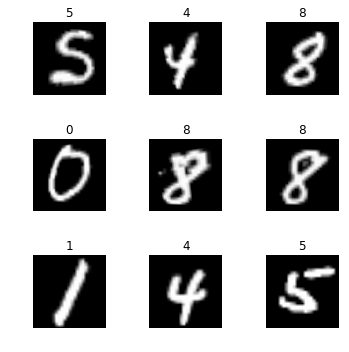

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)


In [8]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy
1,0.164917,0.076131,0.975143
2,0.085231,0.046934,0.986929
3,0.058368,0.030424,0.990571
4,0.045902,0.027113,0.991857


In [9]:
learn.save('stage-mnist-1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)


In [11]:
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

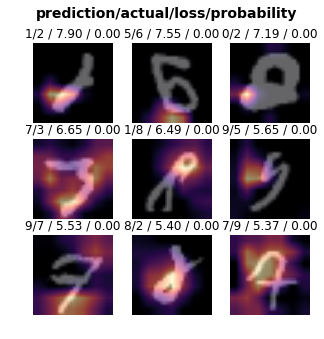

In [12]:
interp.plot_top_losses(9, figsize=(5,5))


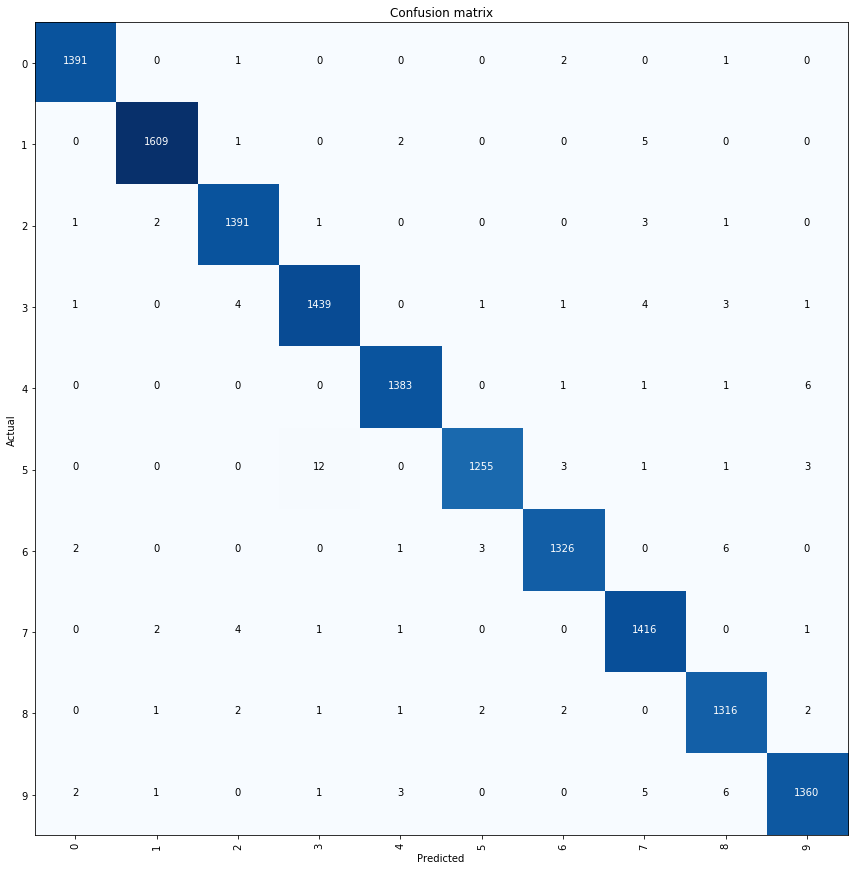

In [13]:
interp.plot_confusion_matrix(figsize=(12,12))


In [14]:
interp.most_confused(min_val=2)


[('5', '3', 12),
 ('4', '9', 6),
 ('6', '8', 6),
 ('9', '8', 6),
 ('1', '7', 5),
 ('9', '7', 5),
 ('3', '2', 4),
 ('3', '7', 4),
 ('7', '2', 4),
 ('2', '7', 3),
 ('3', '8', 3),
 ('5', '6', 3),
 ('5', '9', 3),
 ('6', '5', 3),
 ('9', '4', 3)]

### Unfreezing, fine-tuning, and learning rates


In [27]:
# Since our model is working as we expect it to, we will unfreeze our model and train some more.
learn.unfreeze()
#LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [33]:
learn.load('stage-mnist-1');

learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07


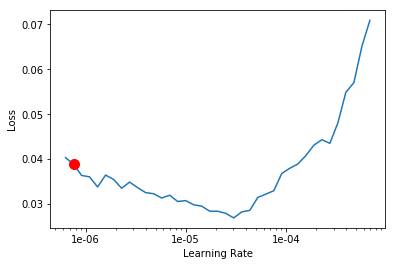

In [34]:
#learn.recorder.plot()
learn.recorder.plot()

In [35]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy
1,0.032441,0.022814,0.993429
2,0.028054,0.021621,0.993357


In [36]:
learn.save('stage-mnist-final')

In [37]:
pat_test = path/'testesting'

In [39]:
(path).ls()


[PosixPath('/home/paperspace/.fastai/data/mnist_png/testing'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/training'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/models')]

In [43]:
(path/'models').ls()

[PosixPath('/home/paperspace/.fastai/data/mnist_png/models/stage-mnist-1.pth'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/models/tmp.pth'),
 PosixPath('/home/paperspace/.fastai/data/mnist_png/models/stage-mnist-final.pth')]